Homework 1

By Arjun Patel

1. Reproduce Exploratory Data Analysis as provided in the specimenLinks (external site)... Discover an interesting aspect of the data that is not shown in the specimen. The specimen is using R language but you will reproduce the analysis in Python using libraries of your on choice.(5)

We will need to create some code to look at the data

Current environemnt runs on python 3.11.1

use pip3 install to install on python3

We will install the following by typing this in the terminal:

pip3 install pandas

pip3 install sklearn

pip3 instal numpy

pip3 install matplotlib


Using Arjun's adddress


/var/folders/lq/gtz9y32j3z3162cl2cxgskdm0000gn/T/ipykernel_29887/3016694326.py:6: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/arjunpatel/Library/Containers/com.microsoft.Excel/Data/Desktop/DatasetHW1.csv')


Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

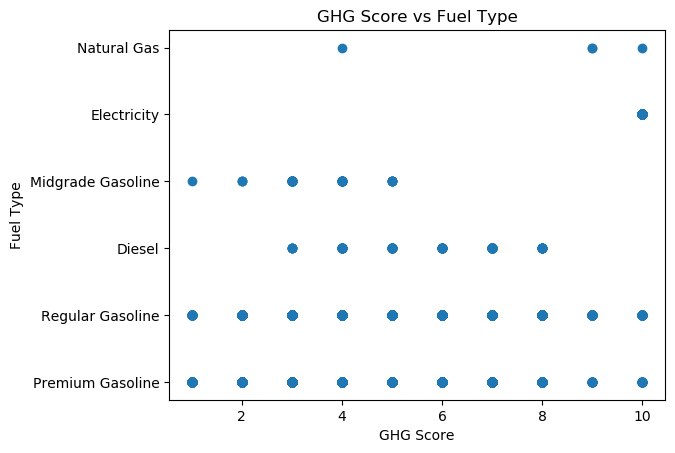

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# We need to read the csv and store it as "data"
print("Using Arjun's adddress")
data = pd.read_csv('/Users/arjunpatel/Library/Containers/com.microsoft.Excel/Data/Desktop/DatasetHW1.csv')

# Any data filled with NA we have to replace as 0 to make it readable
data.fillna(0, inplace=True)


# Print columns to check columns
# Print data to check data
print(data.columns)
print(data)


# Lets take a look at fuel type and ghg score (green house gas score) and compare them

# Here we want to take out any value with -1
new_data = data[data['ghgScore'] != -1]

# Here we want to drop the values with NA in both Columns
new_data.dropna(subset=['fuelType1', 'ghgScore'])

# Lets store both columns for us to compare
fuelType1 = new_data['fuelType1']
ghgScore = new_data['ghgScore']

# Lets create the first graph
plt.scatter(ghgScore,fuelType1)
plt.xlabel('GHG Score')
plt.ylabel('Fuel Type')
plt.title('GHG Score vs Fuel Type')
plt.show()

As you can see above, Premium Gasoline and Regular Gasoline have a wider range of scores. Diesel on the other hand has a smaller range of scores as well as midgrade gasoline and natural gas. The only fuel type that is consistent with scores is electric, which is expected as it does not emit green house gases.

Since matplotlib does not support group by size functions, its hard to say what are the larger groups within this data. We can create a separate graph for each type to do further analysis

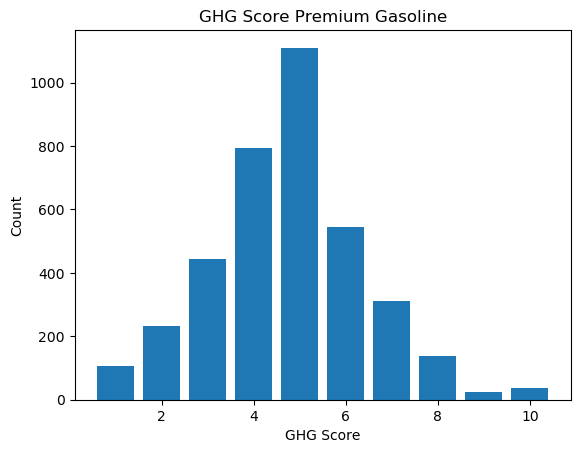

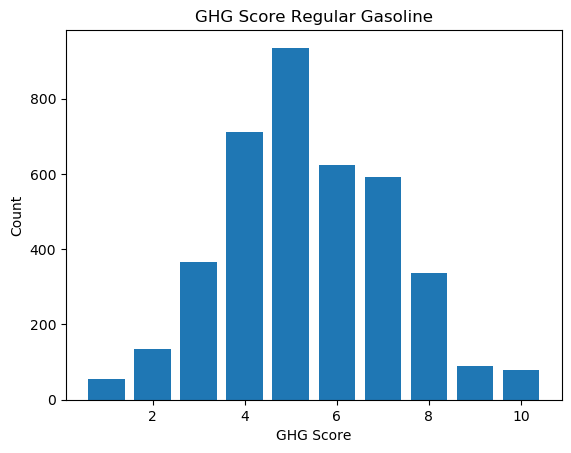

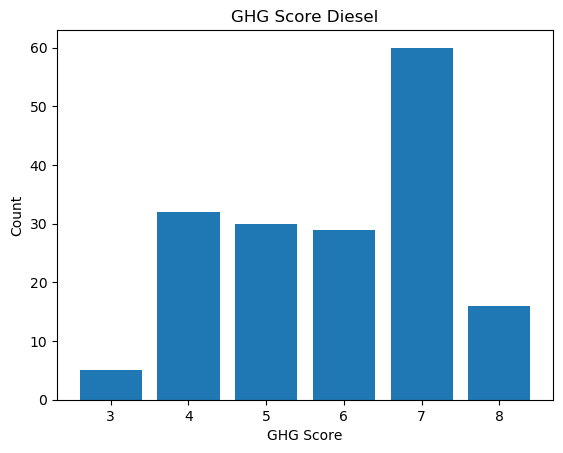

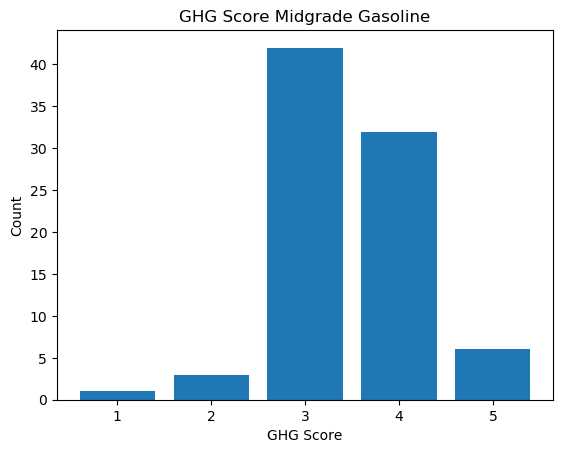

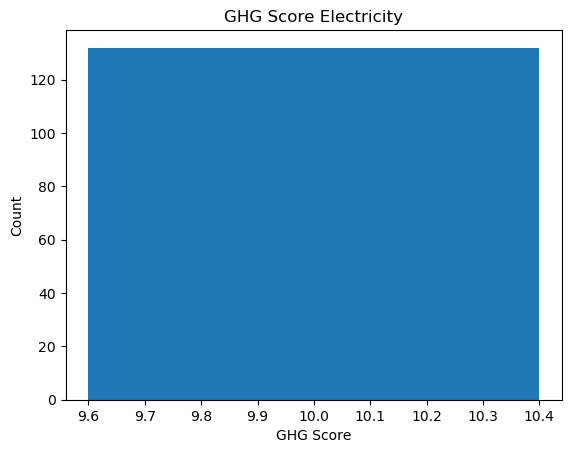

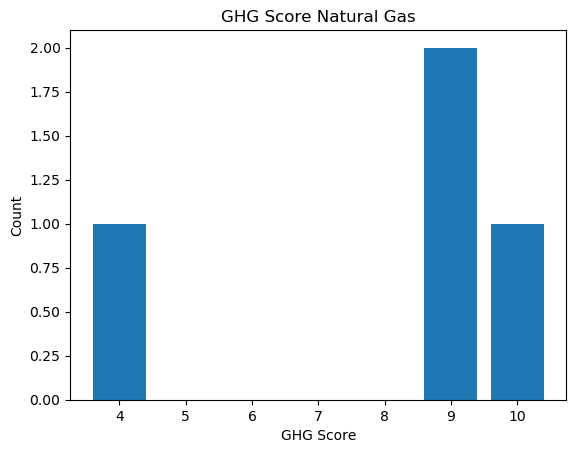

In [43]:
# Create fuel list type
fuellist = new_data['fuelType1'].unique()

# For each fuel type in fuel list
for fueltype in fuellist:
    # if the data in fuelType1 is equal to fueltype during iteration
    # Create the fuel data for this type
    fueldata = new_data[new_data['fuelType1'] == fueltype]
    
    # Here we want to get the ghgScores based on fuel type
    ghgScore = fueldata['ghgScore']

    # Now we want to use fueldata and group by ghgscore and get the size
    # this will be the count for group by
    count = fueldata.groupby('ghgScore').size()
    
    # Create the graphs
    plt.figure()
    plt.bar(count.index, count.values)
    plt.xlabel('GHG Score')
    plt.ylabel('Count')
    plt.title(f'GHG Score {fueltype}')
    plt.show()



As you can see above, these graphs further give us more details of what is going on. Premium and Regular gas has a bell shaped distribution whereas all the others do not. This may be due to the fact that there is not enough data for ghg scores on all other types as we should expect some bell shaped distribution. For example, the count on natural gas types is around 4, which would mean our model wouldnt be able to predict well when it comes to relating fuel type and ghg score. However, our model may be able to predict the ghg scores for Premium and Regular gas types accurately.

2. The UCity variable is treated as dependent/target variable in the specimen. Discuss your approach to build a predictive model. Is it going to be a classification model or regression model. Why?

Based on this data, the UCity variable seems to be the MPG in city or tells us fuel efficiency in cities. If we want to create a predictive model for fuel efficiency, this depends on what we are aiming for. If we are aiming to define types of models and their fuel efficiency in cities, we will want to use a classification approach. If we are aiming to predict fuel efficiency based on quantative variables, we should use regression. 

Since new cars get added each year, using models of cars would not be appropriate because when new models are needed to be analyzed our data will not have the model in the dataset, which means it will not be able to predict the fuel efficiency. If we are going to use this data to predict the fuel efficiency of new cars or any car, we should look at using a regression model because if we know the quantative aspects such as cylinders, barrales, and combined miles per gallon we can predict fuel efficiency more accurately compared to using a classification model


3. Discuss which variables you will not consider as inputs to the model. Why?

We want to take out variables that do not have to do anything with the car or fuel efficiency. These are the variables I decided to take out

engId: "Just an index variable. no use for prediction"

mpgData: This is just a boolean that states whether there is mpg data or not

id: This is a unique value applied to all vehicles

mfrCode: This is a manufacture code. This isnt crucial data and we shouldnt feed everything to our model

charge120 : "time to charge an electric vehicle in hours at 120 V". Doesnt help with understanding fuel efficiency

charge240 : "time to charge an electric vehicle in hours at 240 V". Doesnt help with understanding fuel efficiency

charge240b : "time to charge an electric vehicle in hours at 240 V using the alternate charger". Doesnt help with understanding fuel efficiency

c240Dscr: Typs of charges. Dont need to use to understand fuel efficiency

c240bDscr: Typs of charges. Dont need to use to understand fuel efficiency

createdOn: Just tells us when the data was created

modifiedOn: Tells us when the data was modified

startStop: Not sure what this value is but we should also take this out since it gives us 0 insight on anything about fuel efficiency



Variables we can assign a number to for each unique value or modified the data to be able to analyze it is:

drive

eng_dscr

fuelType1

fuelType

fuelType2

make

model

phevBlended

trany

VClass

trans_dscr

guzzler

evMotor

rangeA

tCharger

sCharger

atvType

4. How will you evaluate your model to avoid over-fitting/under-fitting.

After creating my own model, my model has a very good R-Squared, however, it could be overfitting the data. This tends to happen with linear and logistic regression models. In order to make sure we can avoid over-fitting is using ridge regression or lasso regularization, which are both different because ridge regression uses l2 regularization and lasso regularization uses l1 regularization. The best way to make sure we use the correct one is to use both seperately and check both using cross-validation to ensure we pick the right model. According to our cross-validation, we can also adjust our model to fit the data more or less

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# We want to split the training data and test data
x_train, x_test, y_train, y_test = train_test_split(
       data[['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'lv2', 'lv4', 'pv2', 'pv4', 'range', 
       'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'year', 'youSaveSpend', 'charge240b', 'phevCity', 
       'phevHwy', 'phevComb']], 
       data['UCity'], test_size=0.3)

# We want to create our model
model = LinearRegression()

# We want to fit our model using the x and y training split
model.fit(x_train, y_train)

# We want to predict our data using our test data
y_pred = model.predict(x_test)

# Now we can evaluate our model using numpy
print('Mean absolute error:', np.mean(np.abs(y_pred - y_test)))
print('Mean squared error:', np.mean((y_pred - y_test)**2))
print('R-squared:', model.score(x_test, y_test))


Mean absolute error: 9.427145261134377e-14
Mean squared error: 3.4892315632066853e-26
R-squared: 1.0
